In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read the train dataset
df = pd.read_csv("CleanTrainData.csv")
df.head(10)

,Unnamed: 0,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,1,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,2,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,3,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,4,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
5,5,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,1
6,6,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,1
7,7,Yes,3,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,0
8,8,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,1
9,9,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,0


In [3]:
# summary of the numerical fields
df.describe()

,Unnamed: 0,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.744300,5403.459283,1621.245798,146.412162,342.410423,0.833876,0.687296
std,177.390811,1.009623,6109.041673,2926.248369,84.037468,64.428629,0.372495,0.463973
min,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,153.250000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,306.500000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,459.750000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,613.000000,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [4]:
# Drop the loan ID and Gender columns.  They have no impact on loan approval
loans = df.drop("Unnamed: 0", axis = 1)

loans.head(10)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
5,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,1
6,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,1
7,Yes,3,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,0
8,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,1
9,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,0


In [5]:
#Look at the data to see where the gaps are in the columns.  
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Married              614 non-null object
Dependents           614 non-null int64
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 52.8+ KB


In [6]:
# Convert all of the 3+ in dependents column to just 3
loans['Dependents']=loans['Dependents'].replace('3+','3')

In [7]:
# Replace NaNs in Dependents column with 0
loans.loc[loans['Dependents'].isnull(), 'Dependents'] = 0

In [8]:
# Replace the NaNs in Married when there is a Co-applicant with Yes
loans.loc[loans['Married'].isnull() & loans['CoapplicantIncome'] > 0, 'Married'] = "Yes"

In [9]:
# Replace the remaining NaNs in Married with No
loans.loc[loans['Married'].isnull(), 'Married'] = "No"

In [11]:
# Replace NaN's in Credit History when the loan was approved to yes/1
loans.loc[loans['Credit_History'].isnull() & loans['Loan_Status']==1, 'Credit_History'] = 1

In [12]:
# Replace remaining NaN's in Credit History with no/0
loans.loc[loans['Credit_History'].isnull(), 'Credit_History'] = 0

In [13]:
# Replace NaN's in Loan Amount Term with 360, which is the majority of loan terms
loans.loc[loans['Loan_Amount_Term'].isnull(), 'Loan_Amount_Term'] = 360

In [14]:
# Replace the NaN's in Self Employed with No
loans.loc[loans['Self_Employed'].isnull(), 'Self_Employed'] = 'No'

In [15]:
# Replace the NaN's in Loan Amount with the average loan amount
averageloan = loans['LoanAmount'].mean()
loans.loc[loans['LoanAmount'].isnull(), 'LoanAmount'] = averageloan

In [16]:
# Review the dataframe again to verify all NaN's are gone
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Married              614 non-null object
Dependents           614 non-null int64
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 52.8+ KB


In [17]:
# Save the clean data in a csv
loans.to_csv('CleanTrainData.csv')

In [18]:
# Analysis for outliers
plt.figure()

loans['LoanAmount'].plot.hist(bins=20)


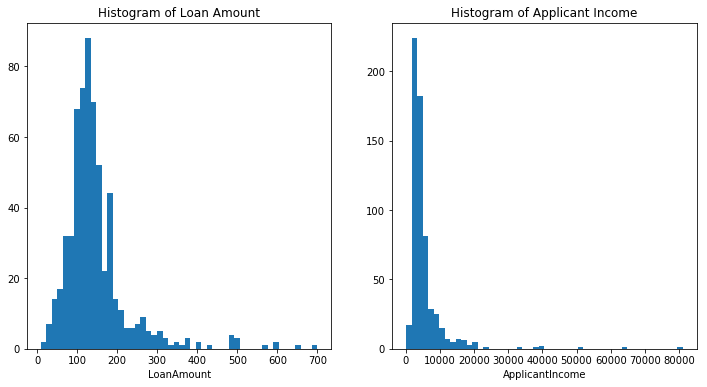

In [41]:
# Frequency charts for Loan Amount and Applicant Income
fig = plt.figure(figsize=(12, 6))
Amount = fig.add_subplot(121)
Income = fig.add_subplot(122)


Amount.hist(loans['LoanAmount'], bins=50)
Amount.set_xlabel('LoanAmount')
Amount.set_title("Histogram of Loan Amount")

Income.hist(loans['ApplicantIncome'], bins=50)
Income.set_xlabel('ApplicantIncome')
Income.set_title("Histogram of Applicant Income")



plt.show()

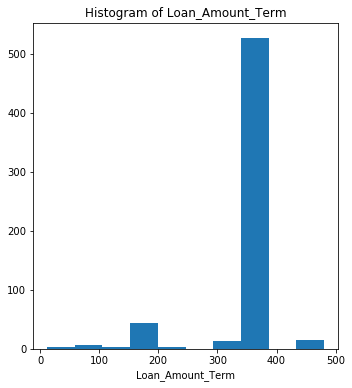

In [47]:
# Frequency chart for Loan_amount_Term
fig = plt.figure(figsize=(12, 6))
Term = fig.add_subplot(122)
Term.hist(loans['Loan_Amount_Term'], bins=10)
Term.set_xlabel('Loan_Amount_Term')
Term.set_title("Histogram of Loan_Amount_Term")

plt.show()

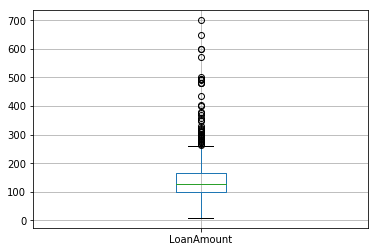

In [20]:
# Outliers and extreme values for LoanAmount
loans.boxplot(column='LoanAmount')
plt.show()


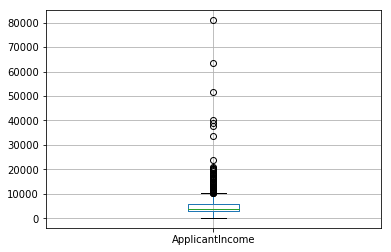

In [21]:
# Outliers and extreme values for 'ApplicantIncome'
loans.boxplot(column='ApplicantIncome')
plt.show()

In [22]:
#count of applicants by credit history 0 or 1
cred_history = loans['Credit_History'].value_counts(ascending=True)

# probability of getting loan based on credit history
# create a pivot table 
# prob = pd.pivot_table(loans,index=["Credit_History"],values=["Loan_Status"],aggfunc=np.mean)


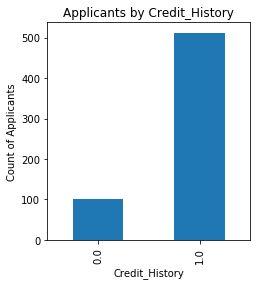

In [23]:
# plot the number of applicants vs credit_history(0 or 1)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
cred_history.plot(kind='bar')
plt.show()



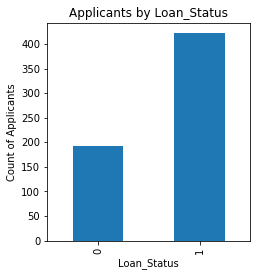

In [25]:
# Loan status is the target variable
#count of applicants by Loan_Status 0 or 1
Loan_hist = loans['Loan_Status'].value_counts(ascending=True)
# Loan Status vs Count Of Applicants
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Loan_Status')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Loan_Status")
Loan_hist.plot(kind='bar')
plt.show()


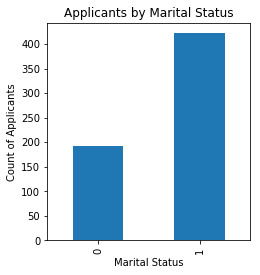

In [26]:

# count of applicants by Marital Status 0 or 1
marital_hist = loans['Married'].value_counts(ascending=True)
# marital status vs Count Of Applicants
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Marital Status")
Loan_hist.plot(kind='bar')
plt.show()

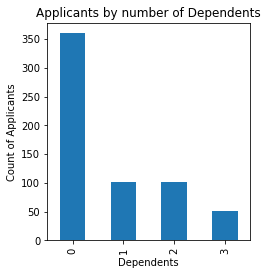

In [27]:
# count of applicants by Dependents
dep_hist= loans['Dependents'].value_counts()
# Dependants vs Count Of Applicants
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Dependents')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by number of Dependents")
dep_hist.plot(kind='bar')
plt.show()

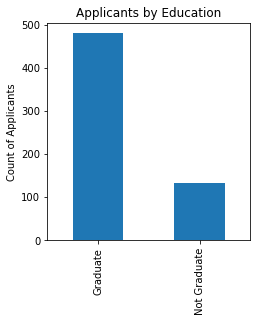

In [30]:
# count of applicants by Dependents
edu_hist= loans['Education'].value_counts()
#Education vs Count Of Applicants
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Education")
edu_hist.plot(kind='bar')
plt.show()

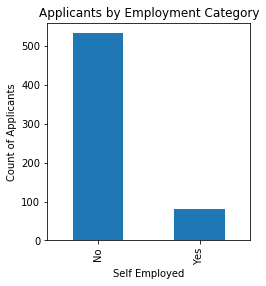

In [32]:
# count of applicants by Self_Employed
emp_hist= loans['Self_Employed'].value_counts()
# Self_Employed vs Count Of Applicants
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Self Employed')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Employment Category")
emp_hist.plot(kind='bar')
plt.show()

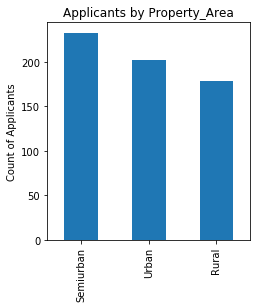

In [56]:
# count of applicants by Property_Area
prop_hist= loans['Property_Area'].value_counts()
# Property_Area vs Count Of Applicants
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Property_Area")
prop_hist.plot(kind='bar')
plt.show()